# Test Step Motor

In [ ]:
! sudo apt-get install python3-rpi.gpio
! pip install RPi.GPIO

[sudo] password for jh20akim: 

In [1]:
import RPi.GPIO as GPIO
import threading
import time

from collections import deque

# for logging
import logging
logging.basicConfig(
    filename="StepMotor28BYJ_Test.log",
    format='%(asctime)s %(levelname)s:%(message)s',
    level=logging.DEBUG,
    datefmt='%m/%d/%Y %I:%M:%S %p',
)
###

class StepMotor28BYJ:
    def __init__(self, stepsPerRevolution=2048, aint=3, bint=5, aint2=7, bint2=8):        
        self.aint = aint    
        self.bint = bint    
        self.aint2 = aint2    
        self.bint2 = bint2
        self.sig= deque([1,0,0,0])
        self.lock = threading.RLock()
        self.stepsPerRevolution = stepsPerRevolution
        
        logging.debug('constructed')
        
    def init(self):
        logging.debug('init called')
        GPIO.setmode(GPIO.BOARD)
        GPIO.setup(self.aint,GPIO.OUT,initial=GPIO.LOW)
        GPIO.setup(self.bint,GPIO.OUT,initial=GPIO.LOW)
        GPIO.setup(self.aint2,GPIO.OUT,initial=GPIO.LOW)
        GPIO.setup(self.bint2,GPIO.OUT,initial=GPIO.LOW)
        logging.debug('init succeed')
        
    def rotate(self, degree, directionRight=True):
        logging.debug('rotate called ')
        degree = min(360, max(0, degree))
        cnt = int ( self.stepsPerRevolution * ( degree / 360 ))
        for i in range(0, cnt):
            self.rotateOnce(directionRight)
        
    def rotateOnce(self, directionRight=True, sleep=0.02):
        logging.debug('rotate called')
        with self.lock:
            sig = self.sig
            GPIO.output(self.aint,sig[0])
            GPIO.output(self.bint,sig[1])
            GPIO.output(self.aint2,sig[2])
            GPIO.output(self.bint2,sig[3])
            sig.rotate(1 if directionRight else -1)
            time.sleep(sleep)
            logging.debug('rotate succeed')

            
    def deinit(self):
        GPIO.cleanup()
        logging.debug('deInit succeed')
        
   

In [3]:
# iterate by times

import time

# Set count as 1000
# targetCnt = 1000 
targetCnt = 100 
# targetCnt = 10 
try:
    motor = StepMotor28BYJ()
    motor.init()
        
    for cnt in range(0, targetCnt):
        if cnt % 300 == 0 :
            print ("current cnt: ", cnt)
        motor.rotateOnce(False, sleep=0.002)
except KeyboardInterrupt:
    pass
finally:
    motor.deinit()

current cnt:  0


In [45]:
# order by degree
try:
    motor = StepMotor28BYJ()
    motor.init()
    motor.rotate(360, False)
        
except KeyboardInterrupt:
    pass
finally:
    motor.deinit()

# Test Servo Motor

In [52]:
import RPi.GPIO as GPIO
import time

GPIO.setmode(GPIO.BOARD)

# set up GPIO pin for servo control
servo_pin = 12
GPIO.setup(servo_pin, GPIO.OUT)

# set up PWM signal for servo control
pwm = GPIO.PWM(servo_pin, 50)

# set initial position of servo motor
pwm.start(2.5)
# rotate the motor to the 90 degree position
pwm.ChangeDutyCycle(7.5)
time.sleep(1)

# rotate the motor back to the 0 degree position
pwm.ChangeDutyCycle(2.5)
time.sleep(1)

# clean up GPIO pins
pwm.stop()
GPIO.cleanup()

In [4]:
import RPi.GPIO as GPIO
import time

# GPIO Servo모터 제어

servo_pin = 12
GPIO.setmode(GPIO.BOARD)
GPIO.setup(servo_pin, GPIO.OUT)
pwm = GPIO.PWM(servo_pin, 50) # 50Hz( 서보모터 PWM 동작을 위한 주파수 )
pwm.start(3.0) # 서보모터의 0도 위치( 0.6ms ) 이동: 값 3.0은 pwm 주기인 20ms 의 3% 를 의미

for cnt in range(0,3):
    pwm.ChangeDutyCycle(3.0) # 0도
    time.sleep(1.0)
    pwm.ChangeDutyCycle(7.5) # 90도
    time.sleep(1.0)
    pwm.ChangeDutyCycle(12.5) # 180도
    time.sleep(1.0)
pwm.stop()

In [1]:
import RPi.GPIO as GPIO
import threading
import time

def validateAngle(angle, max_angle=180):
    angle = max(0, min(max_angle, angle))
    return angle

class ServoMotorSG90:
    def __init__(self, servo_pin=12, freq=50, dc_min=2.5, dc_max=12.5):        
        self.servo_pin = servo_pin    
        GPIO.setmode(GPIO.BOARD)
        GPIO.setup(servo_pin, GPIO.OUT)
        # Define frequency and duty cycle ranges for PWM
        self.freq = freq;
        self.dc_min = dc_min
        self.dc_max = dc_max
        self.lock = threading.RLock()
        self.pwm = GPIO.PWM(self.servo_pin, 50) # 50Hz( 서보모터 PWM 동작을 위한 주파수 )
        self.pwm.start(0)
    
    def rotate(self, angle_to, angle_from=0):        
        angle_to = validateAngle(angle_to)
        angle_from = validateAngle(angle_from)
        for angle in range(angle_from, angle_to, -1 if angle_to < angle_from else 1 ):
            self.rotateOnce(angle)
        
    def rotateOnce(self, angle):
        with self.lock:
            angle = validateAngle(angle)
            duty = (angle / 180.0) * (self.dc_max - self.dc_min) + self.dc_min        
            print ("rotateOnce: ", angle, ", duty=", duty)    
            self.pwm.ChangeDutyCycle (duty) 
            time.sleep(0.02)

In [3]:
import time

servo = ServoMotorSG90()
try:    
    for degree in [0, 90, 120, 180, 120, 90, 0]:
        print ("Rotate now ", degree)
        servo.rotateOnce(degree) 
        time.sleep(1.0)
except KeyboardInterrupt:
    pass

Rotate now  0
rotateOnce:  0 , duty= 2.5
Rotate now  90
rotateOnce:  90 , duty= 7.5
Rotate now  120
rotateOnce:  120 , duty= 9.166666666666666
Rotate now  180
rotateOnce:  180 , duty= 12.5
Rotate now  120
rotateOnce:  120 , duty= 9.166666666666666
Rotate now  90
rotateOnce:  90 , duty= 7.5
Rotate now  0
rotateOnce:  0 , duty= 2.5


In [4]:
## Test for particle picker

# servo = ServoMotorSG90()
# servo.rotateOnce(0)
servo.rotate(45, 0)
servo.rotate(0, 45)

rotateOnce:  0 , duty= 2.5
rotateOnce:  1 , duty= 2.5555555555555554
rotateOnce:  2 , duty= 2.611111111111111
rotateOnce:  3 , duty= 2.6666666666666665
rotateOnce:  4 , duty= 2.7222222222222223
rotateOnce:  5 , duty= 2.7777777777777777
rotateOnce:  6 , duty= 2.8333333333333335
rotateOnce:  7 , duty= 2.888888888888889
rotateOnce:  8 , duty= 2.9444444444444446
rotateOnce:  9 , duty= 3.0
rotateOnce:  10 , duty= 3.0555555555555554
rotateOnce:  11 , duty= 3.111111111111111
rotateOnce:  12 , duty= 3.1666666666666665
rotateOnce:  13 , duty= 3.2222222222222223
rotateOnce:  14 , duty= 3.2777777777777777
rotateOnce:  15 , duty= 3.333333333333333
rotateOnce:  16 , duty= 3.388888888888889
rotateOnce:  17 , duty= 3.4444444444444446
rotateOnce:  18 , duty= 3.5
rotateOnce:  19 , duty= 3.5555555555555554
rotateOnce:  20 , duty= 3.611111111111111
rotateOnce:  21 , duty= 3.666666666666667
rotateOnce:  22 , duty= 3.7222222222222223
rotateOnce:  23 , duty= 3.7777777777777777
rotateOnce:  24 , duty= 3.8333

# Capture Camera image

In [ ]:
! sudo apt install libopencv-dev python3-opencv python3-scipy
# ! pip install opencv-python

In [1]:
# https://www.genesyslogic.com.tw/en/product_list.php?1st=2

import cv2

for index in range(10):
    cap = cv2.VideoCapture(index)
    if cap.read()[0]:
        fps = cap.get(cv2.CAP_PROP_FPS)
        width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
        print(f"Camera index {index} is available")
        print(f"Frame rate: {fps}")
        print(f"Width: {width}, Height: {height}")
    else:
        print(f"Camera index {index} is not available")
    cap.release()

Camera index 0 is available
Frame rate: 25.0
Width: 640.0, Height: 480.0
Camera index 1 is not available
Camera index 2 is not available
Camera index 3 is not available
Camera index 4 is not available
Camera index 5 is not available
Camera index 6 is not available
Camera index 7 is not available
Camera index 8 is not available
Camera index 9 is not available


In [3]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import PIL.Image

isStream : bool = True

# Open the first webcam device
capture = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not capture.isOpened():
    print("Cannot open camera")
    exit()
try:    
    print("Open camera")
    # capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1018)
    # capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
    width = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
    print("width: ", width)
    print("height: ", height)
    while capture.isOpened():
        # Read a frame from the webcam
        ret, frame = capture.read()
        # width = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
        # height = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
        # print("width: ", width)
        # print("height: ", height)

        # Check if the frame is empty
        if not ret:
            print("Failed to read")
            exit()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame
        # cv2.imshow("Webcam", frame)
        # plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        # plt.show()
        clear_output(wait=True)
        display(PIL.Image.fromarray(frame))
        
        if not isStream:
            break
            
except KeyboardInterrupt:
    print("Inturrupted")
except Exception as e:
    print("Error", e)
finally:
    print("Done")

# Release the webcam and destroy all windows
capture.release()
cv2.destroyAllWindows()

Inturrupted
Done


started
read model
input image shape h: 480 w: 640
outputs : [[[3.42858219e+00 1.34778690e+01 2.03073769e+01 ... 5.33548218e+02
   5.54677734e+02 6.07879639e+02]
  [2.50941944e+00 3.58326006e+00 3.69086409e+00 ... 5.68114319e+02
   5.79738647e+02 5.91120483e+02]
  [1.66847000e+01 3.24717484e+01 4.85003052e+01 ... 2.14702576e+02
   1.71237823e+02 6.41444092e+01]
  [1.18611755e+01 6.11855793e+00 6.64470196e+00 ... 1.51719879e+02
   1.26901184e+02 1.60243591e+02]
  [2.20503862e-05 3.37570491e-05 3.31697229e-05 ... 3.22067208e-04
   7.37898590e-05 9.02647225e-05]]]


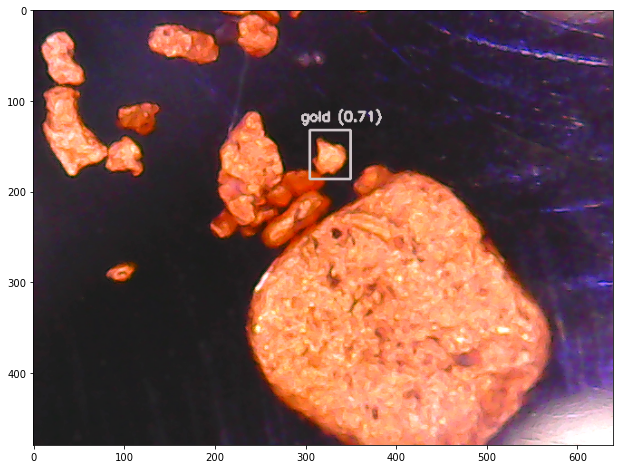

In [ ]:
print("started")
import cv2
import cv2.dnn
import numpy as np
import matplotlib.pyplot as plt

from visions import captureImageFromCamera

test_path="/home/pi/tmp3w4i3b88/picker/20230504_1040_06_0/input.png"

confidence = 0.5

CLASSES = ["gold"]
colors = np.random.uniform(0, 255, size=(len(CLASSES), 3))

def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    label = f'{CLASSES[class_id]} ({confidence:.2f})'
    color = colors[class_id]
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
    cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

print("read model")
model: cv2.dnn.Net = cv2.dnn.readNetFromONNX("/home/pi/Projects/protowork/solution/Control/python/visions/models/best.onnx")

original_image: np.ndarray = cv2.imread(test_path)
# capture from camera
original_image: np.ndarray = cv2.cvtColor(cv2.imread(captureImageFromCamera()), cv2.COLOR_BGR2RGB)

[height, width, _] = original_image.shape
print("input image shape", "h:", height, "w:", width) 

length = max((height, width))
image = np.zeros((length, length, 3), np.uint8)
image[0:height, 0:width] = original_image
scale = length / 640


blob = cv2.dnn.blobFromImage(image, scalefactor=1 / 255, size=(640, 640), swapRB=True)
model.setInput(blob)
outputs = model.forward()

print("outputs :", outputs) 

outputs = np.array([cv2.transpose(outputs[0])])
rows = outputs.shape[1]

boxes = []
scores = []
class_ids = []

for i in range(rows):
    classes_scores = outputs[0][i][4:]
    (minScore, maxScore, minClassLoc, (x, maxClassIndex)) = cv2.minMaxLoc(classes_scores)
    if maxScore >= confidence:
        box = [
            outputs[0][i][0] - (0.5 * outputs[0][i][2]), outputs[0][i][1] - (0.5 * outputs[0][i][3]),
            outputs[0][i][2], outputs[0][i][3]]
        boxes.append(box)
        scores.append(maxScore)
        class_ids.append(maxClassIndex)

result_boxes = cv2.dnn.NMSBoxes(boxes, scores, 0.25, 0.45, 0.5)

detections = []
# original_image = cv2.resize(original_image, (640, 480))

for i in range(len(result_boxes)):
    index = result_boxes[i]
    box = boxes[index]
    detection = {
        'class_id': class_ids[index],
        'class_name': CLASSES[class_ids[index]],
        'confidence': scores[index],
        'box': box,
        'scale': scale}
    detections.append(detection)
    draw_bounding_box(original_image, class_ids[index], scores[index], round(box[0] * scale), round(box[1] * scale),
                      round((box[0] + box[2]) * scale), round((box[1] + box[3]) * scale))

# cv2.imshow('image', original_image)
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
! pip install opencv-python==4.7.0.72

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [ ]:
! pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.5/150.5 MB 753.9 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

In [2]:
import cv2
print(cv2.__version__)

4.7.0-dev


# Gold detector 

input image shape h: 416 w: 416
detection [{'class_id': 0, 'class_name': 'gold', 'confidence': 0.8966315984725952, 'box': [163.16069793701172, 222.29171752929688, 32.964737, 43.256775], 'scale': 0.65, 'scaled_box': [106, 144, 127, 173]}, {'class_id': 0, 'class_name': 'gold', 'confidence': 0.7585904002189636, 'box': [33.43605041503906, 320.60020446777344, 45.208633, 84.34854], 'scale': 0.65, 'scaled_box': [22, 208, 51, 263]}]
Test Image
draw_bounding_box_with_detections {'class_id': 0, 'class_name': 'gold', 'confidence': 0.8966315984725952, 'box': [163.16069793701172, 222.29171752929688, 32.964737, 43.256775], 'scale': 0.65, 'scaled_box': [106, 144, 127, 173]}
draw_bounding_box_with_detections {'class_id': 0, 'class_name': 'gold', 'confidence': 0.7585904002189636, 'box': [33.43605041503906, 320.60020446777344, 45.208633, 84.34854], 'scale': 0.65, 'scaled_box': [22, 208, 51, 263]}
{'class_id': 0, 'class_name': 'gold', 'confidence': 0.8966315984725952, 'box': [163.16069793701172, 222.2917

<Figure size 864x576 with 0 Axes>

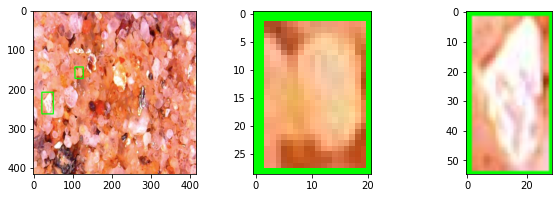

In [1]:
from visions import GoldDetector
import matplotlib.pyplot as plt
import cv2


def draw_bounding_box_with_detections(img, detections):
    for detection in detections:   
        print("draw_bounding_box_with_detections", detection)
        x = detection["scaled_box"][0]
        y = detection["scaled_box"][1]
        x_plus_w = detection["scaled_box"][2]
        y_plus_h = detection["scaled_box"][3]
        color = (0, 255, 0)        
        
        cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
    

test_image_path = "/home/pi/Projects/protowork/solution/Control/test.jpg"

detector = GoldDetector("/home/pi/Projects/protowork/solution/Control/python/visions/models/best.onnx")
# print("Camera", detector.detectFromCamera())
detections, _, _ = detector.detectFromImagePath(test_image_path)
print("detection", detections)
image = cv2.imread(test_image_path)


plt.figure(figsize=(12, 8))

print("Test Image")
figSize = len(detections)+1
fig, axs = plt.subplots(1, figSize, figsize=(10, figSize))


draw_bounding_box_with_detections(image, detections)

axs[0].imshow(cv2.cvtColor(image,  cv2.COLOR_BGR2RGB))

for ix, detection in enumerate(detections):
    print(detection)    
    axs[ix+1].imshow(cv2.cvtColor(image[detection["scaled_box"][1]:detection["scaled_box"][3],
                                       detection["scaled_box"][0]:detection["scaled_box"][2]], cv2.COLOR_BGR2RGB))    
    
    

In [18]:
class CylinderMatrix:
    def __init__(self, radius, stepRes):
        self.radius = radius
        self.stepRes = stepRes
        self.singleRes = radius / (stepRes/4)
        print("created ", self.radius, "stepRes:" ,self.stepRes, "singleRes", self.singleRes)
        
    def move(self, from_x, to_x):
        print("move", from_x, "->", to_x)
        move_dist = to_x - from_x 
        direct = True
        if move_dist < 0 :
            direct = False
            move_dist = abs(move_dist)
        step = int (move_dist / self.singleRes)
        print("move", step , "Right" if direct else "Left",)
        ret = from_x + (self.singleRes * step if direct else (-1)*self.singleRes*step)
        print("result", ret)
        return step
        
        
cylinder = CylinderMatrix(4.7, 2048)
step = cylinder.move(-2.5, 2.5)
print("step", step)
step = cylinder.move(2.5, -1.5)
print("step", step)

created  4.7 stepRes: 2048 singleRes 0.0091796875
move -2.5 -> 2.5
move 544 Right
result 2.4937500000000004
step 544
move 2.5 -> -1.5
move 435 Left
result -1.4931640625
step 435


In [29]:
class ScaledMatrix:
    def __init__(self, x=0, y=0, scaled=1.0):
        self.start_x = x
        self.start_y = y
        self.scaled = scaled
        print("created ", self.scaled, "start_x:" ,self.start_x, "start_y:", self.start_y)
        
    def x(self, x):
        return self.start_x + (x*self.scaled)
    
    def y(self, y):
        return self.start_y  + (y*self.scaled)
    
    
    
mat = ScaledMatrix(100, 100, 2.1/460)
print("150", str(mat.x(150)))
print("460", str(mat.x(460)))
        

created  0.004565217391304348 start_x: 100 start_y: 100
150 100.68478260869566
150 102.1


# Control picker handle

In [2]:

# engine
from motors.step import StepMotor28BYJ
from motors.servo import ServoMotorSG90
#### 2. particle picker

from mk1_picker import ParticlePicker
stepMotor2 = StepMotor28BYJ(aint=3, bint=5, aint2=7, bint2=8)
stepMotor2.init()
servoMotor = ServoMotorSG90(servo_pin=12)

/home/pi/Projects/protowork/solution/Control/python/motors/step.py:19: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(self.aint,GPIO.OUT,initial=GPIO.LOW)
/home/pi/Projects/protowork/solution/Control/python/motors/step.py:20: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(self.bint,GPIO.OUT,initial=GPIO.LOW)
/home/pi/Projects/protowork/solution/Control/python/motors/step.py:21: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(self.aint2,GPIO.OUT,initial=GPIO.LOW)
/home/pi/Projects/protowork/solution/Control/python/motors/step.py:22: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(self.bint2,GPIO.OUT,initial=GPIO.LOW)
/home/pi/Projects/protowork/solution/Control/p

In [6]:
# init
servoMotor.rotateOnce(0)
servoMotor.rotate(45, 0)
servoMotor.rotate(0, 45)
!pwd

/home/pi/Projects/protowork/solution/Control/python


CylinderMatrix:: created  4.7 stepRes: 2048 singleRes 0.0091796875
input image shape h: 416 w: 416
detections [[106, 144, 127, 173], [22, 208, 51, 263]]
detections_scaled [(-0.5149038461538462, 2.326923076923077, -0.4088942307692308, 2.473317307692308), (-0.9389423076923077, 2.6500000000000004, -0.7925480769230769, 2.927644230769231)]
detections_scaled sorted: [(-0.5149038461538462, 2.326923076923077, -0.4088942307692308, 2.473317307692308), (-0.9389423076923077, 2.6500000000000004, -0.7925480769230769, 2.927644230769231)]
CylinderMatrix:: move  186  :: ( -0.4088942307692308 -> 1.3  ==  1.2985276442307692
CylinderMatrix:: move  227  :: ( -0.7925480769230769 -> 1.3  ==  1.2912409855769234
[(-0.5149038461538462, 2.326923076923077, -0.4088942307692308, 2.473317307692308), (-0.9389423076923077, 2.6500000000000004, -0.7925480769230769, 2.927644230769231)]


NameError: name 'GPIO' is not defined

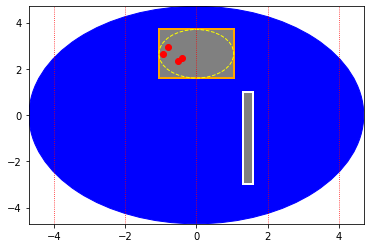

In [3]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

import numpy as np


def plot_cylinder(savePath, x=[], y=[]):
    plt.cla()
    plt.plot(x, y, 'or')
    plt.xlim(-4.7, 4.7)
    plt.ylim(-4.7, 4.7)
    plt.grid(axis='x', color='red', linestyle=':')
    plt.gca().add_patch(plt.Circle((0, 0), radius=4.7, color='blue', clip_on=True))
    plt.gca().add_patch(Rectangle((-1.05,1.6), 2.1,2.1,
                        edgecolor='orange',
                        facecolor='grey',
                        lw=2))
    plt.gca().add_patch(Rectangle((1.3,-3.0), 0.3, 4,
                        edgecolor='white',
                        facecolor='grey',
                        lw=2))
    plt.gca().add_patch(plt.Circle((0, 1.6+(2.1/2)), radius=(2.1/2), color='yellow', fill=False, linestyle='--'))
    plt.savefig(savePath)    

test_image_path = "/home/pi/Projects/protowork/solution/Control/test.jpg"

picker = ParticlePicker(stepMotor2, servoMotor, debugPath=None)
ret, scaled = picker.checkParticle(test_image_path)



x= []
y= []

for d in scaled:
    x.append(d[0])
    x.append(d[2])
    y.append(d[1])
    y.append(d[3])

print (scaled)
plot_cylinder("test.png", x, y)

GPIO.cleanup()

In [ ]:
CylinderMatrix:: created  4.7 stepRes: 2048 singleRes 0.0091796875
input image shape h: 416 w: 416
detections [[106, 144, 127, 173], [22, 208, 51, 263]]
detections_scaled [(-0.5149038461538462, 2.326923076923077, -0.4088942307692308, 2.473317307692308), (-0.9389423076923077, 2.6500000000000004, -0.7925480769230769, 2.927644230769231)]
detections_scaled sorted: [(-0.9389423076923077, 2.6500000000000004, -0.7925480769230769, 2.927644230769231), (-0.5149038461538462, 2.326923076923077, -0.4088942307692308, 2.473317307692308)]
[(-0.9389423076923077, 2.6500000000000004, -0.7925480769230769, 2.927644230769231), (-0.5149038461538462, 2.326923076923077, -0.4088942307692308, 2.473317307692308)]